In [22]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


In [23]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 17572 files belonging to 38 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Tw

In [24]:
cnn = tf.keras.models.load_model('trained_plant_disease_model.keras')

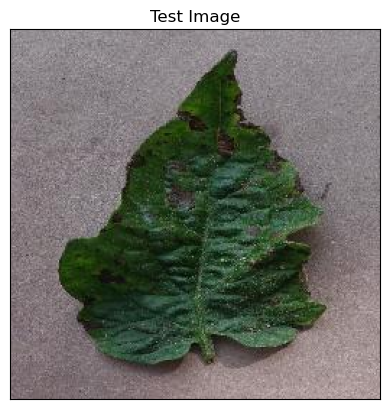

In [41]:
#Test Image Visualization
import cv2
image_path = 'test/test/TomatoEarlyBlight3.JPG'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [42]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


In [43]:
print(predictions)

[[4.62711396e-05 2.45548756e-04 1.08039807e-04 2.45459415e-02
  1.60478521e-04 1.77729642e-04 4.43317549e-05 2.16423614e-05
  5.72381532e-06 2.49322384e-05 4.08238120e-05 2.74771941e-03
  1.19474856e-02 5.12273982e-05 1.16612064e-04 1.63835124e-04
  6.64686842e-04 4.52212153e-05 2.48373573e-04 5.26916003e-04
  5.99298301e-06 1.57035468e-03 4.44708392e-03 4.22908273e-03
  7.62423081e-03 6.45851687e-05 8.37073676e-05 4.56231137e-05
  8.85666627e-03 1.70119286e-01 4.45825187e-03 9.74693708e-03
  1.40545191e-02 5.65081418e-01 1.15374260e-01 4.63287421e-02
  5.85876731e-03 1.17053845e-04]]


In [44]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

33


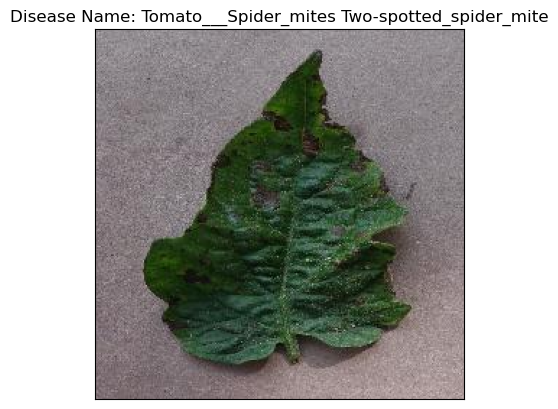

In [45]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()

In [46]:
model_prediction

'Tomato___Spider_mites Two-spotted_spider_mite'